### Random Forest Algorithm with implementation of classification trees algorithm form sklearn

In [45]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import tree

In [46]:
# Define Random forest

class RandomForest():
    
    def __init__(self,x,y,n_trees,n_features,sample_sz,depth=2,min_leaf=5):
        np.random.seed(25)
        self.n_features = n_features
        self.sample_sz = sample_sz
        print("number of features: ", self.n_features,"sample size: ", self.sample_sz)
        self.x, self.y, self.depth, self.min_leaf = x, y, depth, min_leaf
        self.features_labels = []
        self.trees = [self.creat_tree() for i in range(n_trees)]
        
        
    def creat_tree(self):
        idxs = np.random.choice(len(self.y),size=self.sample_sz,replace=False)
        features_idxs = np.random.permutation(self.x.shape[1])[:self.n_features]
        self.features_labels.append(features_idxs)
        clf = tree.DecisionTreeClassifier(criterion='gini',max_depth=self.depth, min_samples_leaf=self.min_leaf)
        return clf.fit(self.x.iloc[idxs,features_idxs], self.y.iloc[idxs])
        
    def predict(self,x):
        return np.sign(np.mean([t.predict(x.iloc[:,l]) for (t,l) in zip(self.trees, self.features_labels)], axis=0))


In [47]:
# Load data
mushroom = pd.read_csv('Mushroom.csv',header=-1)
df_train = mushroom.iloc[0:6000,:]
df_test = mushroom.iloc[6000:,:]
df_test = df_test.reset_index(drop=True)

In [48]:
# Varying size of random features 5,10,15,20

feature_sizes = [5,10,15,20]
train_accs = []
test_accs = []

for f in feature_sizes:
    myfit = RandomForest(x=df_train.iloc[:,1:], 
                         y=df_train.iloc[:,0],n_trees=100,n_features=f, sample_sz=6000,depth=2, min_leaf=5)
    train_acc = df_train.iloc[:,0] == myfit.predict(df_train.iloc[:,1:])
    test_acc = df_test.iloc[:,0] == myfit.predict(df_test.iloc[:,1:])
    train_accs.append(sum(train_acc)/df_train.shape[0])
    test_accs.append(sum(test_acc)/df_test.shape[0])

number of features:  5 sample size:  6000
number of features:  10 sample size:  6000
number of features:  15 sample size:  6000
number of features:  20 sample size:  6000


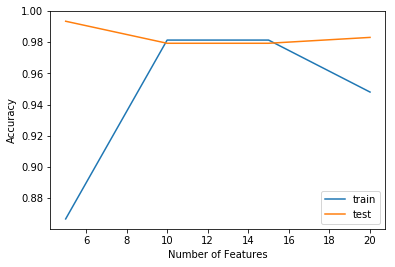

In [49]:
plt.plot(feature_sizes,train_accs,label='train')
plt.plot(feature_sizes,test_accs,label='test')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('features.png')

In [50]:
# Varying size of descision trees: 10,20,40,80,100 and fixing number of features at 20

tree_sizes = [10,20,40,80,100]
train_accs = []
test_accs = []

for n in tree_sizes:
    myfit = RandomForest(x=df_train.iloc[:,1:], 
                         y=df_train.iloc[:,0],n_trees=n,n_features=20, sample_sz=6000,depth=2, min_leaf=5)
    train_acc = df_train.iloc[:,0] == myfit.predict(df_train.iloc[:,1:])
    test_acc = df_test.iloc[:,0] == myfit.predict(df_test.iloc[:,1:])
    train_accs.append(sum(train_acc)/df_train.shape[0])
    test_accs.append(sum(test_acc)/df_test.shape[0])


number of features:  20 sample size:  6000
number of features:  20 sample size:  6000
number of features:  20 sample size:  6000
number of features:  20 sample size:  6000
number of features:  20 sample size:  6000


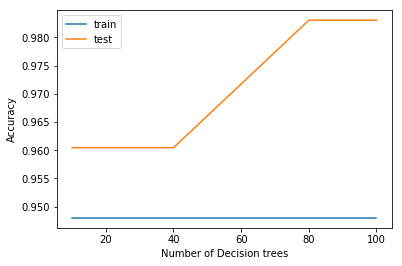

In [51]:
# Plot accuracy vs. # of learners
plt.plot(tree_sizes,train_accs,label='train')
plt.plot(tree_sizes,test_accs,label='test')
plt.xlabel('Number of Decision trees')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('trees.png')